In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth



# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


# 시간 측정을 위한 시간 모듈
import datetime

# 주식정보
from pandas_datareader import data

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer


# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 출력창 청소를 위한 함수
from IPython.display import clear_output

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 다중 분류를 위한 원핫 인코딩
# 결과 데이터의 종류 수 만큼 결과 데이터의 칼럼을 늘리는 작업
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델을 읽어온다.
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다. 
gpus = tf.config.experimental.list_physical_devices("GPU")
# gpu가 있다면
if len(gpus) >0 :
    try :
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# seed 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# 데이터를 읽어온다.
df1 = pd.read_csv("data/wine.csv", header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
# 입력과 결과로 나눈다.
X = df1.drop(12, axis=1)
y = df1[12]

In [5]:
model = Sequential()

model.add(Dense(30, input_dim=12))
model.add(Activation("relu"))

model.add(Dense(12))
model.add(Activation("relu"))

model.add(Dense(8))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [6]:
# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
history = model.fit(X, y, validation_split=0.2, epochs=2000, batch_size=1000)

Epoch 1/2000
6/6 [==============================] - 1s 65ms/step - loss: 0.5985 - accuracy: 0.6011 - val_loss: 0.1685 - val_accuracy: 0.9985
Epoch 2/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.4680 - accuracy: 0.6998 - val_loss: 0.0909 - val_accuracy: 0.9985
Epoch 3/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.4486 - accuracy: 0.7150 - val_loss: 0.1196 - val_accuracy: 0.9985
Epoch 4/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.3993 - accuracy: 0.7766 - val_loss: 0.1892 - val_accuracy: 0.9954
Epoch 5/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.3660 - accuracy: 0.8611 - val_loss: 0.2223 - val_accuracy: 0.9808
Epoch 6/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.3393 - accuracy: 0.8886 - val_loss: 0.2002 - val_accuracy: 0.9723
Epoch 7/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.3177 - accuracy: 0.8940 - val_loss: 0.1760 - val_accuracy: 0.9677
Epoch 8/2000


Epoch 59/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.1532 - accuracy: 0.9411 - val_loss: 0.0875 - val_accuracy: 0.9785
Epoch 60/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.1508 - accuracy: 0.9413 - val_loss: 0.1029 - val_accuracy: 0.9777
Epoch 61/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.1500 - accuracy: 0.9407 - val_loss: 0.0905 - val_accuracy: 0.9785
Epoch 62/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.1464 - accuracy: 0.9430 - val_loss: 0.0955 - val_accuracy: 0.9777
Epoch 63/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.1457 - accuracy: 0.9452 - val_loss: 0.0691 - val_accuracy: 0.9846
Epoch 64/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.1447 - accuracy: 0.9434 - val_loss: 0.1064 - val_accuracy: 0.9731
Epoch 65/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.1439 - accuracy: 0.9450 - val_loss: 0.0971 - val_accuracy: 0.9815
Epoch 

6/6 [==============================] - 0s 23ms/step - loss: 0.0909 - accuracy: 0.9729 - val_loss: 0.0598 - val_accuracy: 0.9869
Epoch 117/2000
6/6 [==============================] - 0s 22ms/step - loss: 0.0905 - accuracy: 0.9721 - val_loss: 0.0648 - val_accuracy: 0.9854
Epoch 118/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.0948 - val_accuracy: 0.9762
Epoch 119/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0957 - accuracy: 0.9696 - val_loss: 0.0606 - val_accuracy: 0.9862
Epoch 120/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.0921 - accuracy: 0.9709 - val_loss: 0.0532 - val_accuracy: 0.9869
Epoch 121/2000
6/6 [==============================] - 0s 39ms/step - loss: 0.0890 - accuracy: 0.9723 - val_loss: 0.0606 - val_accuracy: 0.9854
Epoch 122/2000
6/6 [==============================] - 0s 24ms/step - loss: 0.0891 - accuracy: 0.9702 - val_loss: 0.0852 - val_accuracy: 0.9785
Epoch 123/2000

6/6 [==============================] - 0s 13ms/step - loss: 0.0692 - accuracy: 0.9794 - val_loss: 0.0698 - val_accuracy: 0.9792
Epoch 174/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0663 - accuracy: 0.9802 - val_loss: 0.0676 - val_accuracy: 0.9800
Epoch 175/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0672 - accuracy: 0.9798 - val_loss: 0.0544 - val_accuracy: 0.9854
Epoch 176/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0623 - val_accuracy: 0.9808
Epoch 177/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0653 - accuracy: 0.9811 - val_loss: 0.0534 - val_accuracy: 0.9838
Epoch 178/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0664 - accuracy: 0.9810 - val_loss: 0.0559 - val_accuracy: 0.9838
Epoch 179/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0508 - val_accuracy: 0.9854
Epoch 180/2000

6/6 [==============================] - 0s 14ms/step - loss: 0.0583 - accuracy: 0.9815 - val_loss: 0.0790 - val_accuracy: 0.9777
Epoch 231/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0583 - accuracy: 0.9825 - val_loss: 0.0458 - val_accuracy: 0.9885
Epoch 232/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0591 - accuracy: 0.9823 - val_loss: 0.0575 - val_accuracy: 0.9815
Epoch 233/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0593 - accuracy: 0.9810 - val_loss: 0.0846 - val_accuracy: 0.9746
Epoch 234/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0596 - accuracy: 0.9823 - val_loss: 0.0504 - val_accuracy: 0.9877
Epoch 235/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0586 - accuracy: 0.9831 - val_loss: 0.0576 - val_accuracy: 0.9846
Epoch 236/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0573 - accuracy: 0.9831 - val_loss: 0.0464 - val_accuracy: 0.9877
Epoch 237/2000

6/6 [==============================] - 0s 25ms/step - loss: 0.0540 - accuracy: 0.9835 - val_loss: 0.0725 - val_accuracy: 0.9831
Epoch 288/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0541 - accuracy: 0.9844 - val_loss: 0.0459 - val_accuracy: 0.9892
Epoch 289/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0552 - accuracy: 0.9835 - val_loss: 0.0689 - val_accuracy: 0.9838
Epoch 290/2000
6/6 [==============================] - 0s 21ms/step - loss: 0.0537 - accuracy: 0.9840 - val_loss: 0.0733 - val_accuracy: 0.9815
Epoch 291/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0547 - accuracy: 0.9846 - val_loss: 0.0516 - val_accuracy: 0.9862
Epoch 292/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0527 - accuracy: 0.9852 - val_loss: 0.0639 - val_accuracy: 0.9846
Epoch 293/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0533 - accuracy: 0.9842 - val_loss: 0.0665 - val_accuracy: 0.9823
Epoch 294/2000

6/6 [==============================] - 0s 24ms/step - loss: 0.0501 - accuracy: 0.9858 - val_loss: 0.0726 - val_accuracy: 0.9838
Epoch 345/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0619 - val_accuracy: 0.9862
Epoch 346/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0495 - accuracy: 0.9867 - val_loss: 0.0585 - val_accuracy: 0.9854
Epoch 347/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0493 - accuracy: 0.9867 - val_loss: 0.0712 - val_accuracy: 0.9831
Epoch 348/2000
6/6 [==============================] - 0s 26ms/step - loss: 0.0497 - accuracy: 0.9865 - val_loss: 0.0597 - val_accuracy: 0.9854
Epoch 349/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0496 - accuracy: 0.9873 - val_loss: 0.0693 - val_accuracy: 0.9831
Epoch 350/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0494 - accuracy: 0.9871 - val_loss: 0.0484 - val_accuracy: 0.9915
Epoch 351/2000

6/6 [==============================] - 0s 15ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0887 - val_accuracy: 0.9754
Epoch 402/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0524 - accuracy: 0.9861 - val_loss: 0.0582 - val_accuracy: 0.9885
Epoch 403/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0485 - accuracy: 0.9881 - val_loss: 0.0539 - val_accuracy: 0.9915
Epoch 404/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0486 - accuracy: 0.9863 - val_loss: 0.0758 - val_accuracy: 0.9777
Epoch 405/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0479 - accuracy: 0.9865 - val_loss: 0.0579 - val_accuracy: 0.9915
Epoch 406/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0467 - accuracy: 0.9875 - val_loss: 0.0858 - val_accuracy: 0.9762
Epoch 407/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0529 - val_accuracy: 0.9931
Epoch 408/2000

6/6 [==============================] - 0s 21ms/step - loss: 0.0454 - accuracy: 0.9879 - val_loss: 0.0620 - val_accuracy: 0.9931
Epoch 459/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0458 - accuracy: 0.9886 - val_loss: 0.0600 - val_accuracy: 0.9931
Epoch 460/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0458 - accuracy: 0.9867 - val_loss: 0.0745 - val_accuracy: 0.9885
Epoch 461/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0448 - accuracy: 0.9873 - val_loss: 0.0660 - val_accuracy: 0.9908
Epoch 462/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0450 - accuracy: 0.9873 - val_loss: 0.1073 - val_accuracy: 0.9654
Epoch 463/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0501 - accuracy: 0.9856 - val_loss: 0.0535 - val_accuracy: 0.9931
Epoch 464/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0466 - accuracy: 0.9871 - val_loss: 0.0811 - val_accuracy: 0.9831
Epoch 465/2000

6/6 [==============================] - 0s 16ms/step - loss: 0.0486 - accuracy: 0.9860 - val_loss: 0.0665 - val_accuracy: 0.9931
Epoch 516/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0448 - accuracy: 0.9888 - val_loss: 0.0677 - val_accuracy: 0.9931
Epoch 517/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0431 - accuracy: 0.9886 - val_loss: 0.0982 - val_accuracy: 0.9769
Epoch 518/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0457 - accuracy: 0.9883 - val_loss: 0.0669 - val_accuracy: 0.9923
Epoch 519/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0439 - accuracy: 0.9900 - val_loss: 0.0769 - val_accuracy: 0.9900
Epoch 520/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0430 - accuracy: 0.9883 - val_loss: 0.0791 - val_accuracy: 0.9900
Epoch 521/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0429 - accuracy: 0.9886 - val_loss: 0.0713 - val_accuracy: 0.9923
Epoch 522/2000

6/6 [==============================] - 0s 15ms/step - loss: 0.0431 - accuracy: 0.9877 - val_loss: 0.0786 - val_accuracy: 0.9900
Epoch 573/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0418 - accuracy: 0.9892 - val_loss: 0.1062 - val_accuracy: 0.9808
Epoch 574/2000
6/6 [==============================] - 0s 24ms/step - loss: 0.0437 - accuracy: 0.9883 - val_loss: 0.0645 - val_accuracy: 0.9931
Epoch 575/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0426 - accuracy: 0.9888 - val_loss: 0.0785 - val_accuracy: 0.9908
Epoch 576/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 0.0932 - val_accuracy: 0.9862
Epoch 577/2000
6/6 [==============================] - 0s 24ms/step - loss: 0.0423 - accuracy: 0.9885 - val_loss: 0.0816 - val_accuracy: 0.9900
Epoch 578/2000
6/6 [==============================] - 0s 20ms/step - loss: 0.0443 - accuracy: 0.9888 - val_loss: 0.0982 - val_accuracy: 0.9808
Epoch 579/2000

6/6 [==============================] - 0s 17ms/step - loss: 0.0400 - accuracy: 0.9896 - val_loss: 0.0827 - val_accuracy: 0.9900
Epoch 630/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0408 - accuracy: 0.9896 - val_loss: 0.0834 - val_accuracy: 0.9908
Epoch 631/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0410 - accuracy: 0.9886 - val_loss: 0.0930 - val_accuracy: 0.9885
Epoch 632/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0419 - accuracy: 0.9885 - val_loss: 0.0778 - val_accuracy: 0.9915
Epoch 633/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0432 - accuracy: 0.9883 - val_loss: 0.0696 - val_accuracy: 0.9938
Epoch 634/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0419 - accuracy: 0.9894 - val_loss: 0.1016 - val_accuracy: 0.9823
Epoch 635/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0464 - accuracy: 0.9879 - val_loss: 0.0966 - val_accuracy: 0.9854
Epoch 636/2000

6/6 [==============================] - 0s 17ms/step - loss: 0.0403 - accuracy: 0.9894 - val_loss: 0.0869 - val_accuracy: 0.9892
Epoch 687/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.1083 - val_accuracy: 0.9846
Epoch 688/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0407 - accuracy: 0.9883 - val_loss: 0.0722 - val_accuracy: 0.9946
Epoch 689/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0428 - accuracy: 0.9892 - val_loss: 0.0775 - val_accuracy: 0.9923
Epoch 690/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0420 - accuracy: 0.9885 - val_loss: 0.1104 - val_accuracy: 0.9792
Epoch 691/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0400 - accuracy: 0.9894 - val_loss: 0.0837 - val_accuracy: 0.9908
Epoch 692/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0409 - accuracy: 0.9890 - val_loss: 0.0739 - val_accuracy: 0.9938
Epoch 693/2000

6/6 [==============================] - 0s 15ms/step - loss: 0.0397 - accuracy: 0.9888 - val_loss: 0.0869 - val_accuracy: 0.9908
Epoch 744/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0423 - accuracy: 0.9888 - val_loss: 0.0754 - val_accuracy: 0.9938
Epoch 745/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.0895 - val_accuracy: 0.9900
Epoch 746/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0381 - accuracy: 0.9911 - val_loss: 0.1028 - val_accuracy: 0.9877
Epoch 747/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0390 - accuracy: 0.9904 - val_loss: 0.0883 - val_accuracy: 0.9900
Epoch 748/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0380 - accuracy: 0.9902 - val_loss: 0.1040 - val_accuracy: 0.9846
Epoch 749/2000
6/6 [==============================] - 0s 21ms/step - loss: 0.0390 - accuracy: 0.9898 - val_loss: 0.1054 - val_accuracy: 0.9862
Epoch 750/2000

6/6 [==============================] - 0s 24ms/step - loss: 0.0457 - accuracy: 0.9875 - val_loss: 0.0748 - val_accuracy: 0.9946
Epoch 801/2000
6/6 [==============================] - 0s 21ms/step - loss: 0.0439 - accuracy: 0.9885 - val_loss: 0.0951 - val_accuracy: 0.9908
Epoch 802/2000
6/6 [==============================] - 0s 20ms/step - loss: 0.0403 - accuracy: 0.9886 - val_loss: 0.1070 - val_accuracy: 0.9885
Epoch 803/2000
6/6 [==============================] - 0s 22ms/step - loss: 0.0406 - accuracy: 0.9877 - val_loss: 0.1142 - val_accuracy: 0.9862
Epoch 804/2000
6/6 [==============================] - 0s 24ms/step - loss: 0.0390 - accuracy: 0.9908 - val_loss: 0.0794 - val_accuracy: 0.9938
Epoch 805/2000
6/6 [==============================] - 0s 25ms/step - loss: 0.0403 - accuracy: 0.9896 - val_loss: 0.1177 - val_accuracy: 0.9838
Epoch 806/2000
6/6 [==============================] - 0s 21ms/step - loss: 0.0387 - accuracy: 0.9894 - val_loss: 0.0958 - val_accuracy: 0.9900
Epoch 807/2000

6/6 [==============================] - 0s 28ms/step - loss: 0.0373 - accuracy: 0.9904 - val_loss: 0.0903 - val_accuracy: 0.9915
Epoch 858/2000
6/6 [==============================] - 0s 27ms/step - loss: 0.0382 - accuracy: 0.9908 - val_loss: 0.0936 - val_accuracy: 0.9915
Epoch 859/2000
6/6 [==============================] - 0s 30ms/step - loss: 0.0385 - accuracy: 0.9898 - val_loss: 0.1202 - val_accuracy: 0.9846
Epoch 860/2000
6/6 [==============================] - 0s 28ms/step - loss: 0.0374 - accuracy: 0.9900 - val_loss: 0.0973 - val_accuracy: 0.9915
Epoch 861/2000
6/6 [==============================] - 0s 23ms/step - loss: 0.0370 - accuracy: 0.9902 - val_loss: 0.1370 - val_accuracy: 0.9769
Epoch 862/2000
6/6 [==============================] - 0s 21ms/step - loss: 0.0384 - accuracy: 0.9896 - val_loss: 0.0928 - val_accuracy: 0.9915
Epoch 863/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.9908 - val_loss: 0.1061 - val_accuracy: 0.9900
Epoch 864/2000

6/6 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.9906 - val_loss: 0.1073 - val_accuracy: 0.9885
Epoch 915/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0386 - accuracy: 0.9904 - val_loss: 0.0919 - val_accuracy: 0.9915
Epoch 916/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.9904 - val_loss: 0.1074 - val_accuracy: 0.9900
Epoch 917/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.9911 - val_loss: 0.0962 - val_accuracy: 0.9915
Epoch 918/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.9892 - val_loss: 0.1037 - val_accuracy: 0.9900
Epoch 919/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.0893 - val_accuracy: 0.9931
Epoch 920/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0369 - accuracy: 0.9898 - val_loss: 0.1191 - val_accuracy: 0.9869
Epoch 921/2000

6/6 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.9894 - val_loss: 0.1148 - val_accuracy: 0.9877
Epoch 972/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.9894 - val_loss: 0.1285 - val_accuracy: 0.9831
Epoch 973/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0406 - accuracy: 0.9896 - val_loss: 0.0863 - val_accuracy: 0.9938
Epoch 974/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.9900 - val_loss: 0.1210 - val_accuracy: 0.9862
Epoch 975/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.9898 - val_loss: 0.1235 - val_accuracy: 0.9862
Epoch 976/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.9898 - val_loss: 0.0923 - val_accuracy: 0.9931
Epoch 977/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.9915 - val_loss: 0.1155 - val_accuracy: 0.9877
Epoch 978/2000

6/6 [==============================] - 0s 17ms/step - loss: 0.0408 - accuracy: 0.9894 - val_loss: 0.1113 - val_accuracy: 0.9869
Epoch 1029/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0400 - accuracy: 0.9910 - val_loss: 0.0844 - val_accuracy: 0.9946
Epoch 1030/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.9896 - val_loss: 0.1472 - val_accuracy: 0.9800
Epoch 1031/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0359 - accuracy: 0.9900 - val_loss: 0.0866 - val_accuracy: 0.9923
Epoch 1032/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.9911 - val_loss: 0.1091 - val_accuracy: 0.9908
Epoch 1033/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.9913 - val_loss: 0.1046 - val_accuracy: 0.9923
Epoch 1034/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.9904 - val_loss: 0.1138 - val_accuracy: 0.9885
Epoch 10

6/6 [==============================] - 0s 25ms/step - loss: 0.0362 - accuracy: 0.9908 - val_loss: 0.0910 - val_accuracy: 0.9931
Epoch 1086/2000
6/6 [==============================] - 0s 22ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.1240 - val_accuracy: 0.9877
Epoch 1087/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.1405 - val_accuracy: 0.9838
Epoch 1088/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0397 - accuracy: 0.9896 - val_loss: 0.0867 - val_accuracy: 0.9938
Epoch 1089/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0427 - accuracy: 0.9886 - val_loss: 0.0946 - val_accuracy: 0.9931
Epoch 1090/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.9890 - val_loss: 0.1454 - val_accuracy: 0.9831
Epoch 1091/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.0927 - val_accuracy: 0.9923
Epoch 10

Epoch 1142/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.9911 - val_loss: 0.1072 - val_accuracy: 0.9908
Epoch 1143/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.1298 - val_accuracy: 0.9885
Epoch 1144/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.9913 - val_loss: 0.1212 - val_accuracy: 0.9900
Epoch 1145/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.9908 - val_loss: 0.1177 - val_accuracy: 0.9892
Epoch 1146/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.9910 - val_loss: 0.1257 - val_accuracy: 0.9885
Epoch 1147/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.9911 - val_loss: 0.1341 - val_accuracy: 0.9885
Epoch 1148/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.9906 - val_loss: 0.1070 - val_accuracy:

Epoch 1199/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.9906 - val_loss: 0.1095 - val_accuracy: 0.9908
Epoch 1200/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.9910 - val_loss: 0.1246 - val_accuracy: 0.9877
Epoch 1201/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0338 - accuracy: 0.9910 - val_loss: 0.1079 - val_accuracy: 0.9900
Epoch 1202/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.1009 - val_accuracy: 0.9908
Epoch 1203/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.9902 - val_loss: 0.1504 - val_accuracy: 0.9785
Epoch 1204/2000
6/6 [==============================] - 0s 24ms/step - loss: 0.0353 - accuracy: 0.9902 - val_loss: 0.1052 - val_accuracy: 0.9915
Epoch 1205/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.9911 - val_loss: 0.0924 - val_accuracy:

Epoch 1256/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.9911 - val_loss: 0.1114 - val_accuracy: 0.9908
Epoch 1257/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0330 - accuracy: 0.9921 - val_loss: 0.1487 - val_accuracy: 0.9862
Epoch 1258/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0337 - accuracy: 0.9919 - val_loss: 0.1281 - val_accuracy: 0.9892
Epoch 1259/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0334 - accuracy: 0.9917 - val_loss: 0.1293 - val_accuracy: 0.9900
Epoch 1260/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0346 - accuracy: 0.9906 - val_loss: 0.1452 - val_accuracy: 0.9885
Epoch 1261/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0335 - accuracy: 0.9913 - val_loss: 0.1209 - val_accuracy: 0.9908
Epoch 1262/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.9898 - val_loss: 0.1297 - val_accuracy:

Epoch 1313/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0338 - accuracy: 0.9919 - val_loss: 0.1160 - val_accuracy: 0.9908
Epoch 1314/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0333 - accuracy: 0.9917 - val_loss: 0.1432 - val_accuracy: 0.9862
Epoch 1315/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0332 - accuracy: 0.9915 - val_loss: 0.1290 - val_accuracy: 0.9892
Epoch 1316/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0338 - accuracy: 0.9913 - val_loss: 0.1307 - val_accuracy: 0.9908
Epoch 1317/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.1219 - val_accuracy: 0.9900
Epoch 1318/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0339 - accuracy: 0.9900 - val_loss: 0.1570 - val_accuracy: 0.9831
Epoch 1319/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.9910 - val_loss: 0.1107 - val_accuracy:

6/6 [==============================] - 0s 14ms/step - loss: 0.0325 - accuracy: 0.9915 - val_loss: 0.1375 - val_accuracy: 0.9885
Epoch 1370/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0328 - accuracy: 0.9913 - val_loss: 0.1282 - val_accuracy: 0.9892
Epoch 1371/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0330 - accuracy: 0.9915 - val_loss: 0.1447 - val_accuracy: 0.9862
Epoch 1372/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.9911 - val_loss: 0.1236 - val_accuracy: 0.9908
Epoch 1373/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.9908 - val_loss: 0.1497 - val_accuracy: 0.9838
Epoch 1374/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0339 - accuracy: 0.9908 - val_loss: 0.1170 - val_accuracy: 0.9900
Epoch 1375/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0333 - accuracy: 0.9913 - val_loss: 0.1356 - val_accuracy: 0.9885
Epoch 13

6/6 [==============================] - 0s 16ms/step - loss: 0.0328 - accuracy: 0.9927 - val_loss: 0.1370 - val_accuracy: 0.9900
Epoch 1427/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0324 - accuracy: 0.9917 - val_loss: 0.1458 - val_accuracy: 0.9854
Epoch 1428/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.9908 - val_loss: 0.1344 - val_accuracy: 0.9892
Epoch 1429/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0339 - accuracy: 0.9908 - val_loss: 0.1592 - val_accuracy: 0.9854
Epoch 1430/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0332 - accuracy: 0.9908 - val_loss: 0.1379 - val_accuracy: 0.9900
Epoch 1431/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.1397 - val_accuracy: 0.9892
Epoch 1432/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0333 - accuracy: 0.9908 - val_loss: 0.1803 - val_accuracy: 0.9800
Epoch 14

6/6 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.9915 - val_loss: 0.1171 - val_accuracy: 0.9900
Epoch 1484/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.9917 - val_loss: 0.1141 - val_accuracy: 0.9915
Epoch 1485/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.9908 - val_loss: 0.1423 - val_accuracy: 0.9838
Epoch 1486/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0329 - accuracy: 0.9917 - val_loss: 0.1300 - val_accuracy: 0.9892
Epoch 1487/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0322 - accuracy: 0.9921 - val_loss: 0.1257 - val_accuracy: 0.9892
Epoch 1488/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0321 - accuracy: 0.9919 - val_loss: 0.1340 - val_accuracy: 0.9900
Epoch 1489/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0320 - accuracy: 0.9919 - val_loss: 0.1916 - val_accuracy: 0.9746
Epoch 14

6/6 [==============================] - 0s 13ms/step - loss: 0.0344 - accuracy: 0.9910 - val_loss: 0.1175 - val_accuracy: 0.9915
Epoch 1541/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.9883 - val_loss: 0.1741 - val_accuracy: 0.9785
Epoch 1542/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0342 - accuracy: 0.9913 - val_loss: 0.1045 - val_accuracy: 0.9931
Epoch 1543/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0337 - accuracy: 0.9904 - val_loss: 0.1441 - val_accuracy: 0.9831
Epoch 1544/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.9902 - val_loss: 0.1331 - val_accuracy: 0.9892
Epoch 1545/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0323 - accuracy: 0.9917 - val_loss: 0.1274 - val_accuracy: 0.9908
Epoch 1546/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0313 - accuracy: 0.9927 - val_loss: 0.1388 - val_accuracy: 0.9885
Epoch 15

6/6 [==============================] - 0s 15ms/step - loss: 0.0310 - accuracy: 0.9921 - val_loss: 0.1389 - val_accuracy: 0.9846
Epoch 1598/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0322 - accuracy: 0.9921 - val_loss: 0.1421 - val_accuracy: 0.9823
Epoch 1599/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.9900 - val_loss: 0.0887 - val_accuracy: 0.9938
Epoch 1600/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.1171 - val_accuracy: 0.9908
Epoch 1601/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.9892 - val_loss: 0.1680 - val_accuracy: 0.9769
Epoch 1602/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.1050 - val_accuracy: 0.9915
Epoch 1603/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.9896 - val_loss: 0.1153 - val_accuracy: 0.9923
Epoch 16

Epoch 1654/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0331 - accuracy: 0.9913 - val_loss: 0.1065 - val_accuracy: 0.9900
Epoch 1655/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0315 - accuracy: 0.9923 - val_loss: 0.1117 - val_accuracy: 0.9908
Epoch 1656/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0319 - accuracy: 0.9910 - val_loss: 0.1379 - val_accuracy: 0.9838
Epoch 1657/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0312 - accuracy: 0.9913 - val_loss: 0.1128 - val_accuracy: 0.9908
Epoch 1658/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0312 - accuracy: 0.9919 - val_loss: 0.1084 - val_accuracy: 0.9915
Epoch 1659/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0317 - accuracy: 0.9913 - val_loss: 0.1335 - val_accuracy: 0.9854
Epoch 1660/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0314 - accuracy: 0.9915 - val_loss: 0.1391 - val_accuracy:

Epoch 1711/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.1644 - val_accuracy: 0.9785
Epoch 1712/2000
6/6 [==============================] - 0s 22ms/step - loss: 0.0332 - accuracy: 0.9913 - val_loss: 0.1239 - val_accuracy: 0.9869
Epoch 1713/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0307 - accuracy: 0.9923 - val_loss: 0.1129 - val_accuracy: 0.9915
Epoch 1714/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0301 - accuracy: 0.9937 - val_loss: 0.1163 - val_accuracy: 0.9900
Epoch 1715/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0309 - accuracy: 0.9917 - val_loss: 0.1237 - val_accuracy: 0.9900
Epoch 1716/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0313 - accuracy: 0.9927 - val_loss: 0.1370 - val_accuracy: 0.9869
Epoch 1717/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0322 - accuracy: 0.9919 - val_loss: 0.1355 - val_accuracy:

6/6 [==============================] - 0s 13ms/step - loss: 0.0327 - accuracy: 0.9908 - val_loss: 0.1247 - val_accuracy: 0.9900
Epoch 1768/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0327 - accuracy: 0.9917 - val_loss: 0.1097 - val_accuracy: 0.9931
Epoch 1769/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.9890 - val_loss: 0.1605 - val_accuracy: 0.9823
Epoch 1770/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0328 - accuracy: 0.9923 - val_loss: 0.1339 - val_accuracy: 0.9900
Epoch 1771/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0323 - accuracy: 0.9917 - val_loss: 0.1506 - val_accuracy: 0.9854
Epoch 1772/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0308 - accuracy: 0.9933 - val_loss: 0.1397 - val_accuracy: 0.9900
Epoch 1773/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0309 - accuracy: 0.9927 - val_loss: 0.1444 - val_accuracy: 0.9885
Epoch 17

6/6 [==============================] - 0s 21ms/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.1436 - val_accuracy: 0.9862
Epoch 1825/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.9904 - val_loss: 0.1234 - val_accuracy: 0.9892
Epoch 1826/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0305 - accuracy: 0.9935 - val_loss: 0.1148 - val_accuracy: 0.9908
Epoch 1827/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0303 - accuracy: 0.9923 - val_loss: 0.1313 - val_accuracy: 0.9869
Epoch 1828/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.0301 - accuracy: 0.9925 - val_loss: 0.0978 - val_accuracy: 0.9915
Epoch 1829/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0321 - accuracy: 0.9913 - val_loss: 0.1375 - val_accuracy: 0.9877
Epoch 1830/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0309 - accuracy: 0.9919 - val_loss: 0.1398 - val_accuracy: 0.9862
Epoch 18

6/6 [==============================] - 0s 15ms/step - loss: 0.0339 - accuracy: 0.9900 - val_loss: 0.1290 - val_accuracy: 0.9908
Epoch 1882/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.1515 - val_accuracy: 0.9831
Epoch 1883/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0311 - accuracy: 0.9927 - val_loss: 0.1153 - val_accuracy: 0.9923
Epoch 1884/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0310 - accuracy: 0.9929 - val_loss: 0.1238 - val_accuracy: 0.9908
Epoch 1885/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.0313 - accuracy: 0.9915 - val_loss: 0.1661 - val_accuracy: 0.9785
Epoch 1886/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0345 - accuracy: 0.9906 - val_loss: 0.1088 - val_accuracy: 0.9931
Epoch 1887/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.0332 - accuracy: 0.9913 - val_loss: 0.1198 - val_accuracy: 0.9915
Epoch 18

6/6 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.2489 - val_accuracy: 0.9531
Epoch 1939/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.9881 - val_loss: 0.1086 - val_accuracy: 0.9931
Epoch 1940/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.9896 - val_loss: 0.1130 - val_accuracy: 0.9923
Epoch 1941/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.9890 - val_loss: 0.1530 - val_accuracy: 0.9846
Epoch 1942/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.9902 - val_loss: 0.1530 - val_accuracy: 0.9869
Epoch 1943/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0328 - accuracy: 0.9910 - val_loss: 0.1238 - val_accuracy: 0.9915
Epoch 1944/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.0293 - accuracy: 0.9935 - val_loss: 0.1312 - val_accuracy: 0.9900
Epoch 19

6/6 [==============================] - 0s 19ms/step - loss: 0.0305 - accuracy: 0.9923 - val_loss: 0.2007 - val_accuracy: 0.9754
Epoch 1996/2000
6/6 [==============================] - 0s 18ms/step - loss: 0.0314 - accuracy: 0.9929 - val_loss: 0.1130 - val_accuracy: 0.9915
Epoch 1997/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.0331 - accuracy: 0.9910 - val_loss: 0.1631 - val_accuracy: 0.9877
Epoch 1998/2000
6/6 [==============================] - 0s 19ms/step - loss: 0.0331 - accuracy: 0.9906 - val_loss: 0.1933 - val_accuracy: 0.9808
Epoch 1999/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0316 - accuracy: 0.9921 - val_loss: 0.1115 - val_accuracy: 0.9938
Epoch 2000/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.0330 - accuracy: 0.9910 - val_loss: 0.1335 - val_accuracy: 0.9892


In [8]:
a1 = history.history["loss"]
a2 = history.history["accuracy"]
a3 = history.history["val_loss"]
a4 = history.history["val_accuracy"]

print(pd.Series(a1).mean())
print(pd.Series(a2).mean())
print(pd.Series(a3).mean())
print(pd.Series(a4).mean())

0.04820219455845654
0.9857744777798653
0.10688053045980632
0.9868084601163865


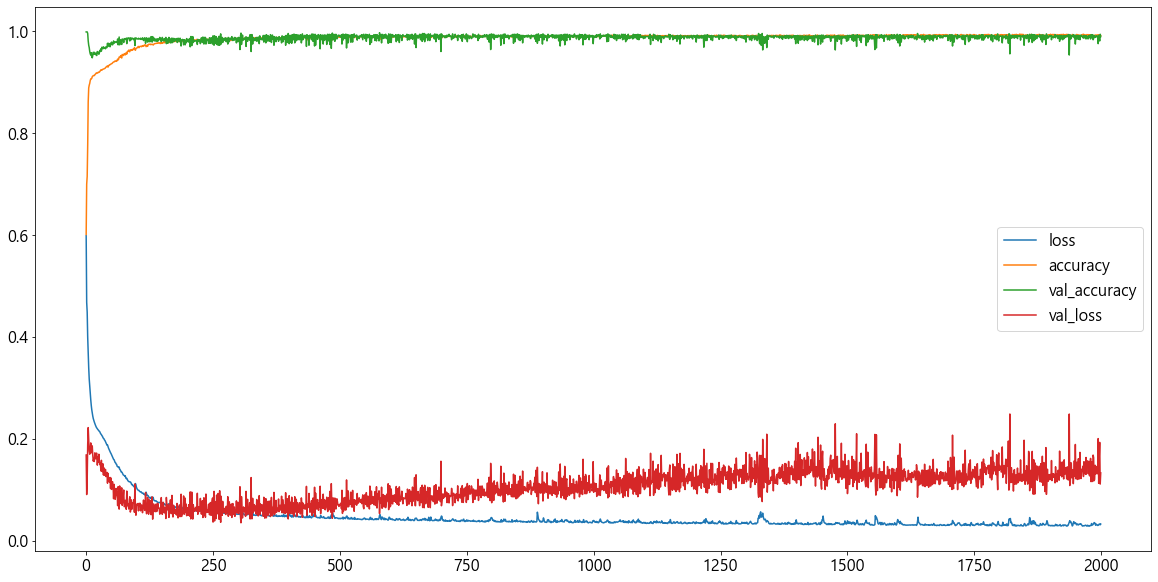

In [12]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

과적합